# Tugas
Buatlah sebuah model K-Means dengan ketentuan,

## 1. Gunakan data 'Mall_Customers.csv'

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
# Load Data
df = pd.read_csv('data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# Cek kolom null
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [26]:
# Drop CustomerID karena bukan fitur yang diperlukan untuk melakukan clustering
df.drop(['CustomerID'], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


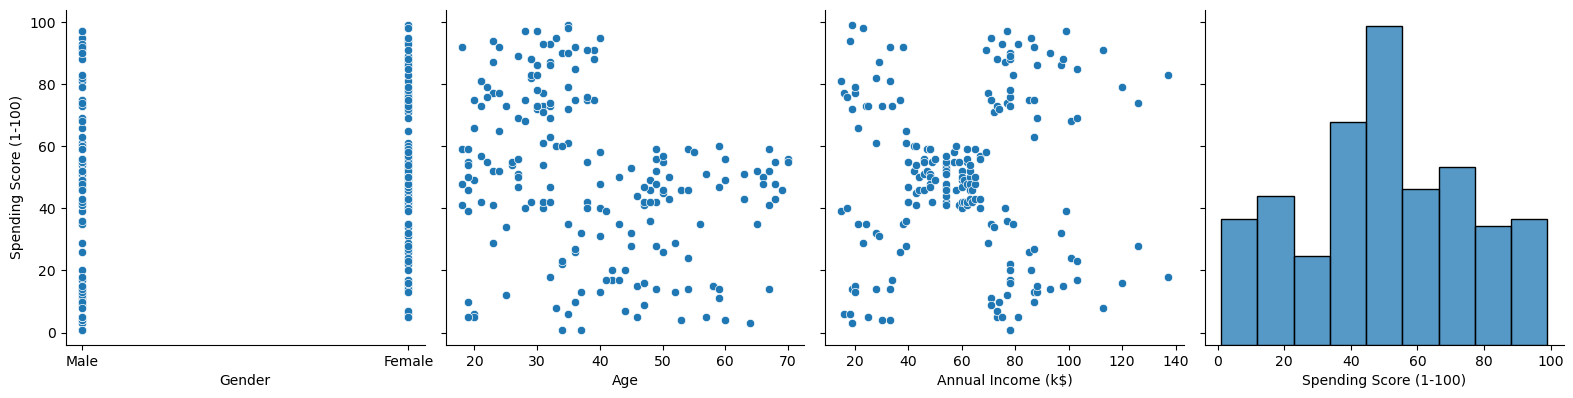

In [27]:
sns.pairplot(df, x_vars=df.columns,
             y_vars=df.columns[-1], height=4, aspect=1, kind='scatter')
plt.show()

Pada grafik sebaran tiap fitur berdasarkan spending score di atas, terlihat pada fitur 'Annual Income (k$)' terdapat cluster-cluster sehingga fitur tersebut beserta dengan Spending Score dapat dijadikan fitur yang tepat untuk clustering. Sedangkan fitur 'Age' tidak begitu terlihat jelas cluster yang ada di grafik tersebut, sehingga fitur tersebut tidak dijadikan fitur untuk clustering kali ini.

## 3. Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.

## 4. Buatlah  implementasi model SOM untuk segmentasi citra lain